In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/clean_movie.csv")

In [4]:
df_2 = df[["revenue","budget","id"]]

In [5]:
df_genre = pd.read_csv("data/genres.csv")

In [6]:
df_final = pd.merge(df_2, df_genre, on=['id'])

In [7]:
df_final["profit"] = df_final["revenue"] - df_final["budget"]

In [8]:
df_final

,revenue,budget,id,genre,profit
0,373554033.0,30000000,862,Animation,343554033.0
1,373554033.0,30000000,862,Comedy,343554033.0
2,373554033.0,30000000,862,Family,343554033.0
3,262797249.0,65000000,8844,Adventure,197797249.0
4,262797249.0,65000000,8844,Fantasy,197797249.0
...,...,...,...,...,...
89793,0.0,0,30840,Romance,0.0
89794,0.0,0,111109,Drama,0.0
89795,0.0,0,67758,Action,0.0
89796,0.0,0,67758,Drama,0.0


In [9]:
df_final_2 = df_final[(df_final.revenue !=0) & (df_final.budget!= 0)]

In [10]:
df_final_2[df_final_2["revenue"]==0]

,revenue,budget,id,genre,profit


In [11]:
df_final_2[df_final_2["budget"]==0]

,revenue,budget,id,genre,profit


In [12]:
df_final_2.isnull().sum()

revenue    0
budget     0
id         0
genre      0
profit     0
dtype: int64

In [13]:
df_final_2["ratio"] = df_final_2["profit"]/df_final_2["budget"]

/var/folders/f2/cz12c7n51tdc3lyzdvj3qf6w0000gn/T/ipykernel_84632/3046836082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2["ratio"] = df_final_2["profit"]/df_final_2["budget"]


In [14]:
df_final_2

,revenue,budget,id,genre,profit,ratio
0,373554033.0,30000000,862,Animation,343554033.0,11.451801
1,373554033.0,30000000,862,Comedy,343554033.0,11.451801
2,373554033.0,30000000,862,Family,343554033.0,11.451801
3,262797249.0,65000000,8844,Adventure,197797249.0,3.043035
4,262797249.0,65000000,8844,Fantasy,197797249.0,3.043035
...,...,...,...,...,...,...
89699,1268793.0,2000000,63281,Drama,-731207.0,-0.365604
89716,1413000.0,5000000,63898,Action,-3587000.0,-0.717400
89717,1413000.0,5000000,63898,Comedy,-3587000.0,-0.717400
89718,1413000.0,5000000,63898,Crime,-3587000.0,-0.717400


<AxesSubplot: xlabel='genre'>

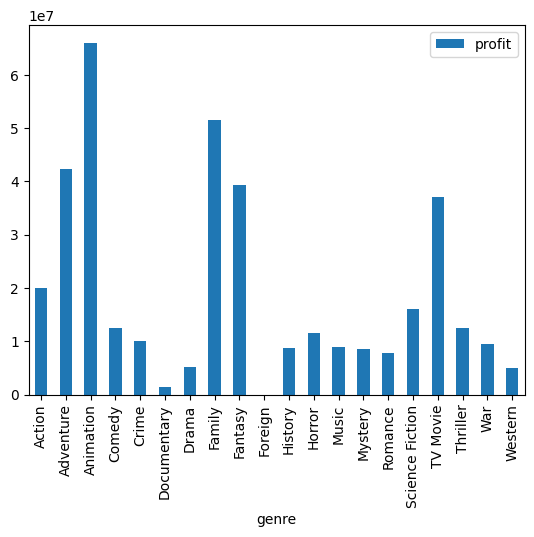

In [94]:
df_final_2.groupby("genre")["profit"].median().to_frame().plot(kind="bar")

<AxesSubplot: xlabel='genre'>

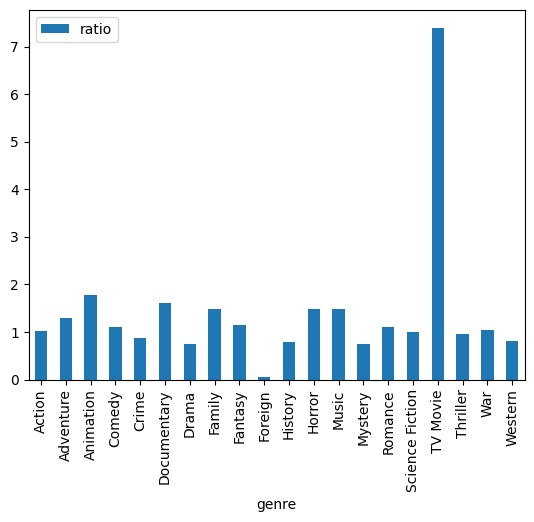

In [15]:
df_final_2.groupby("genre")["ratio"].median().to_frame().plot(kind="bar")

<AxesSubplot: xlabel='genre', ylabel='profit'>

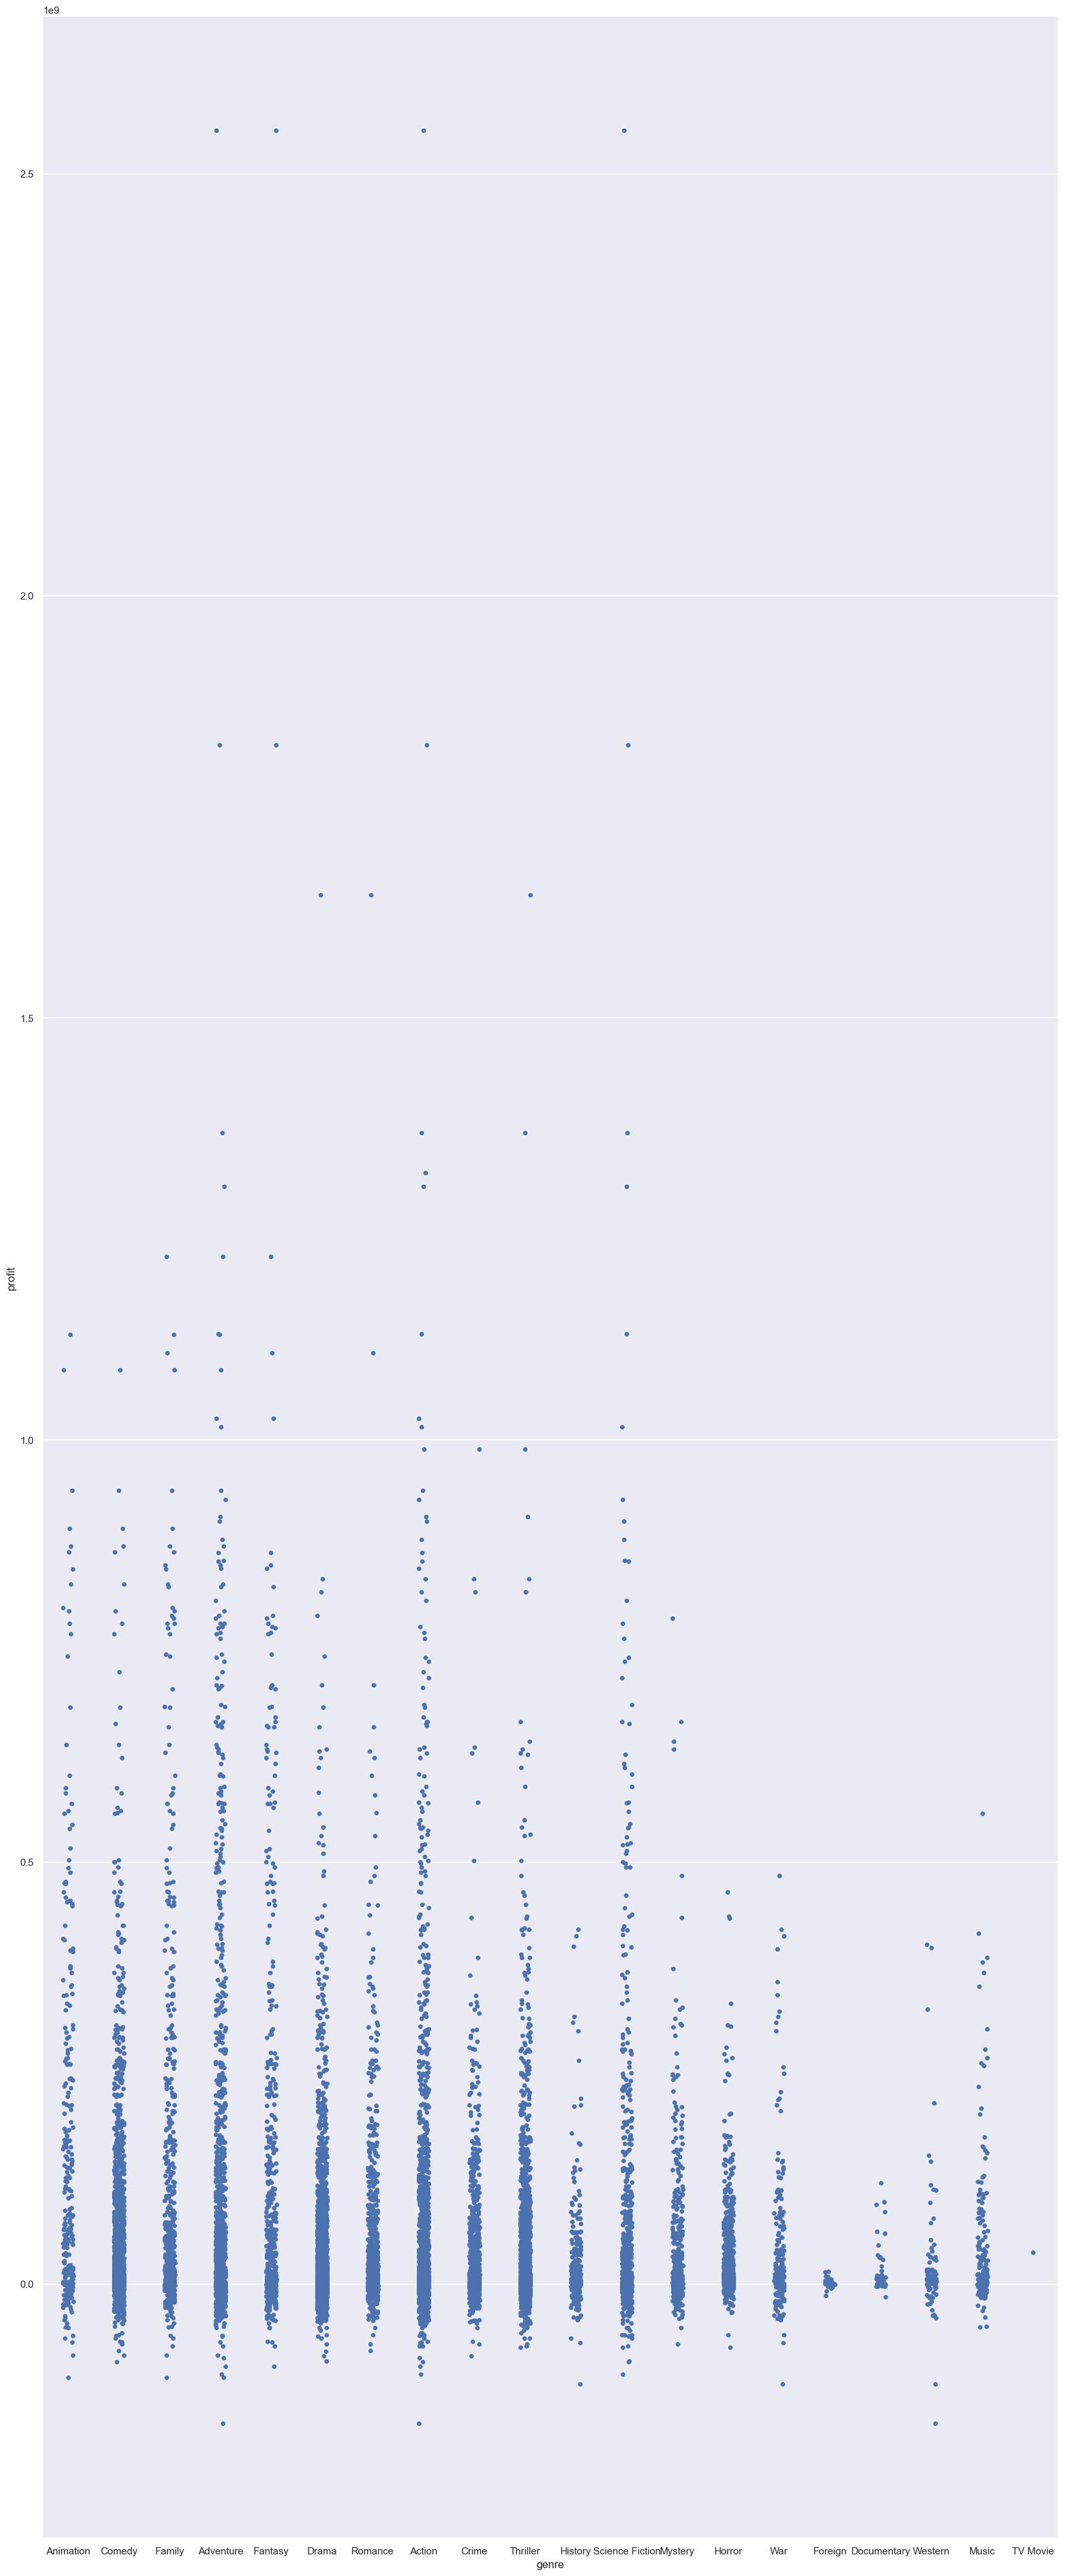

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,50)})
sns.stripplot(data=df_final_2, x="genre", y="profit")

<AxesSubplot: xlabel='genre', ylabel='revenue'>

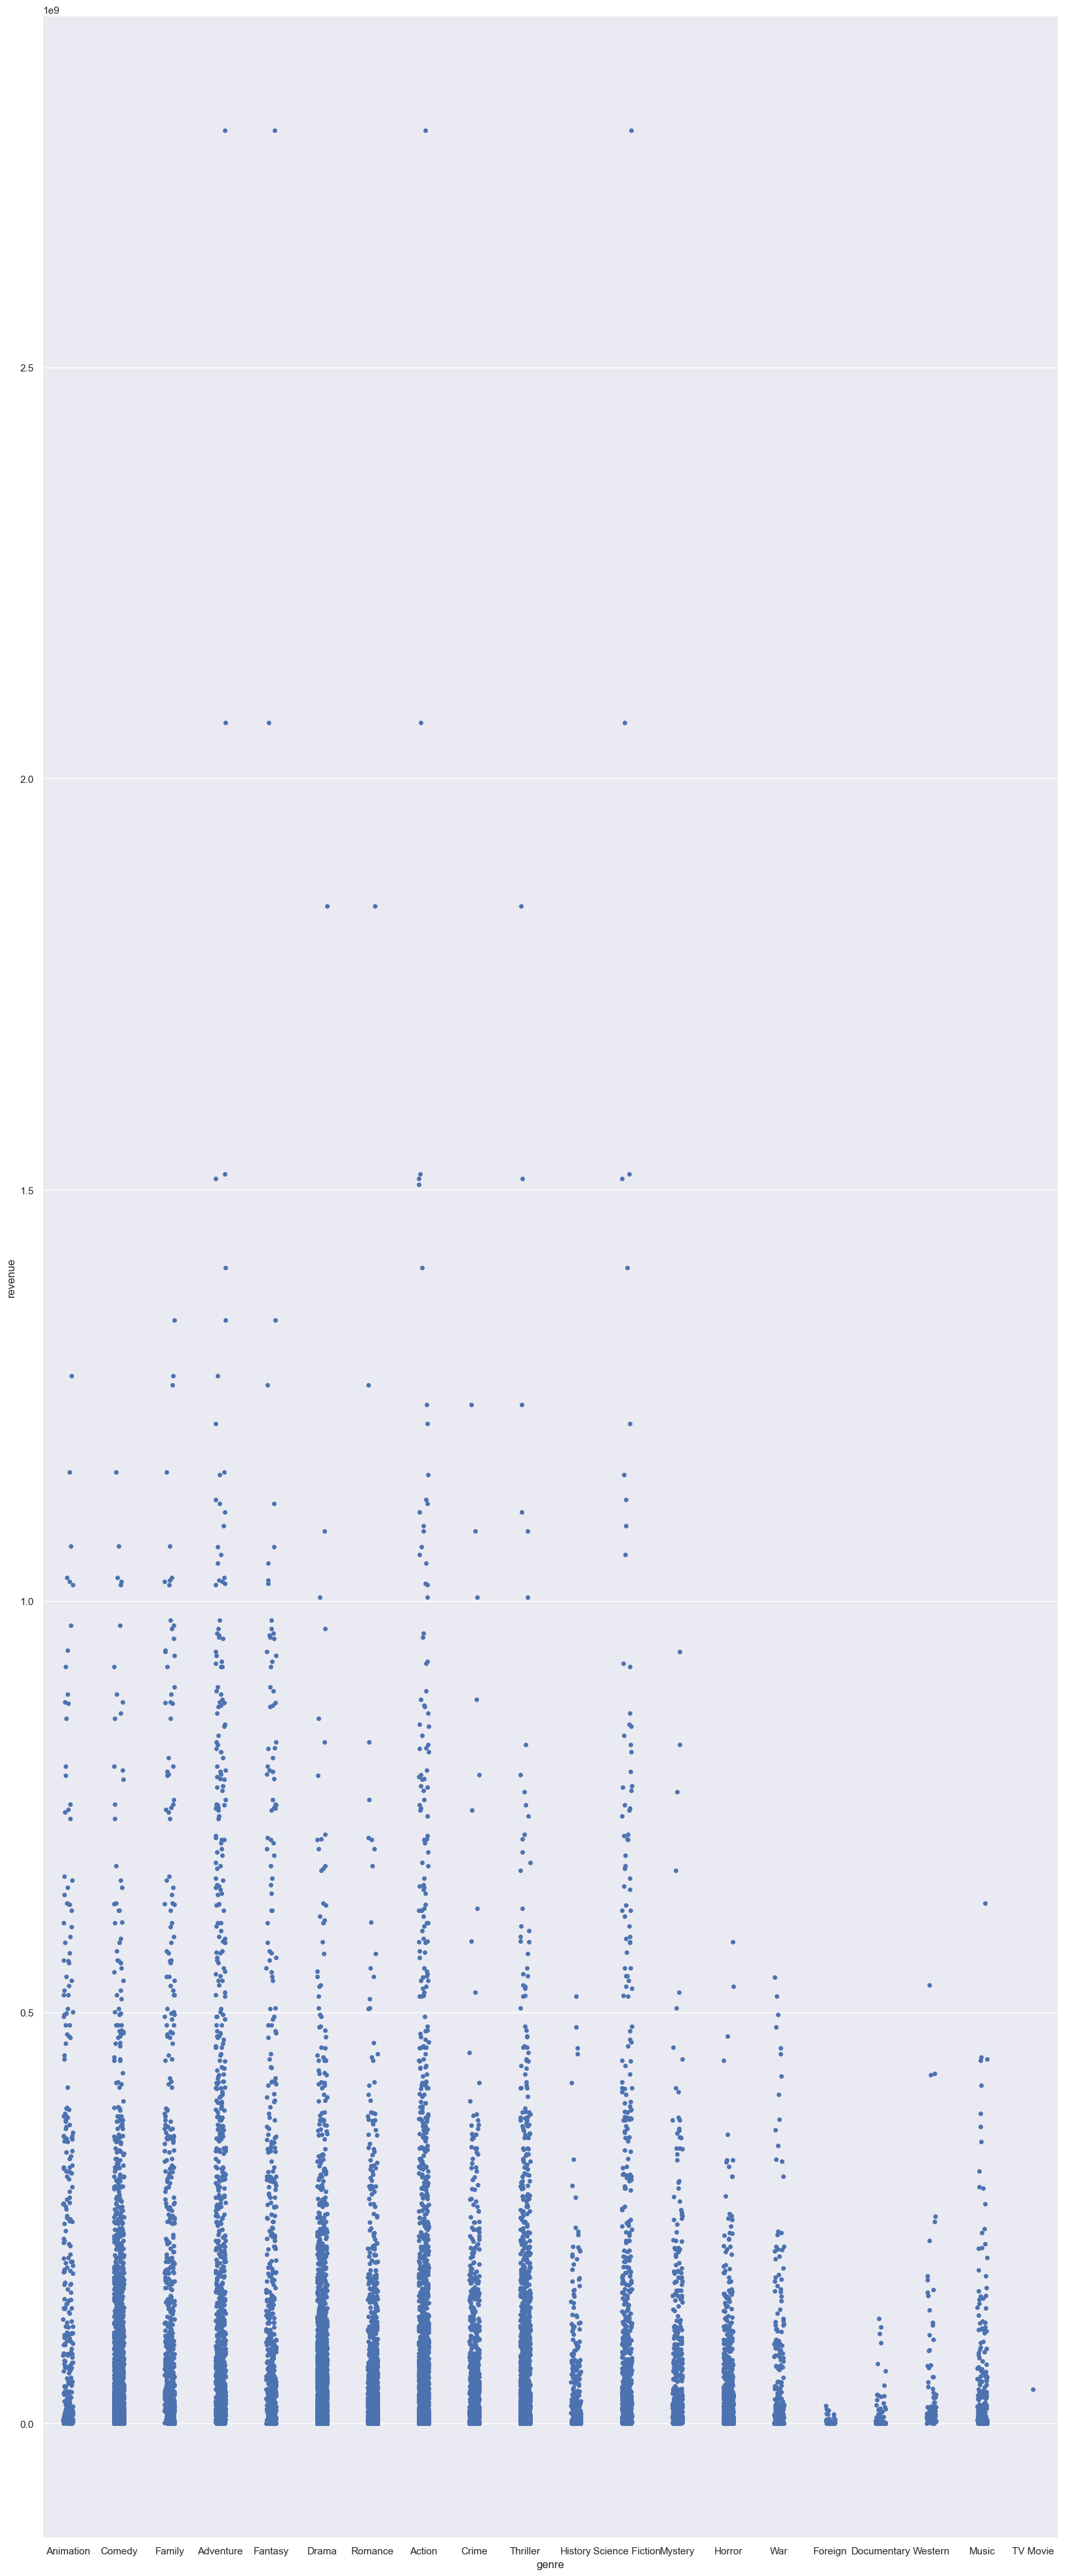

In [24]:
sns.stripplot(data=df_final_2, x="genre", y="revenue")

<AxesSubplot: xlabel='genre', ylabel='ratio'>

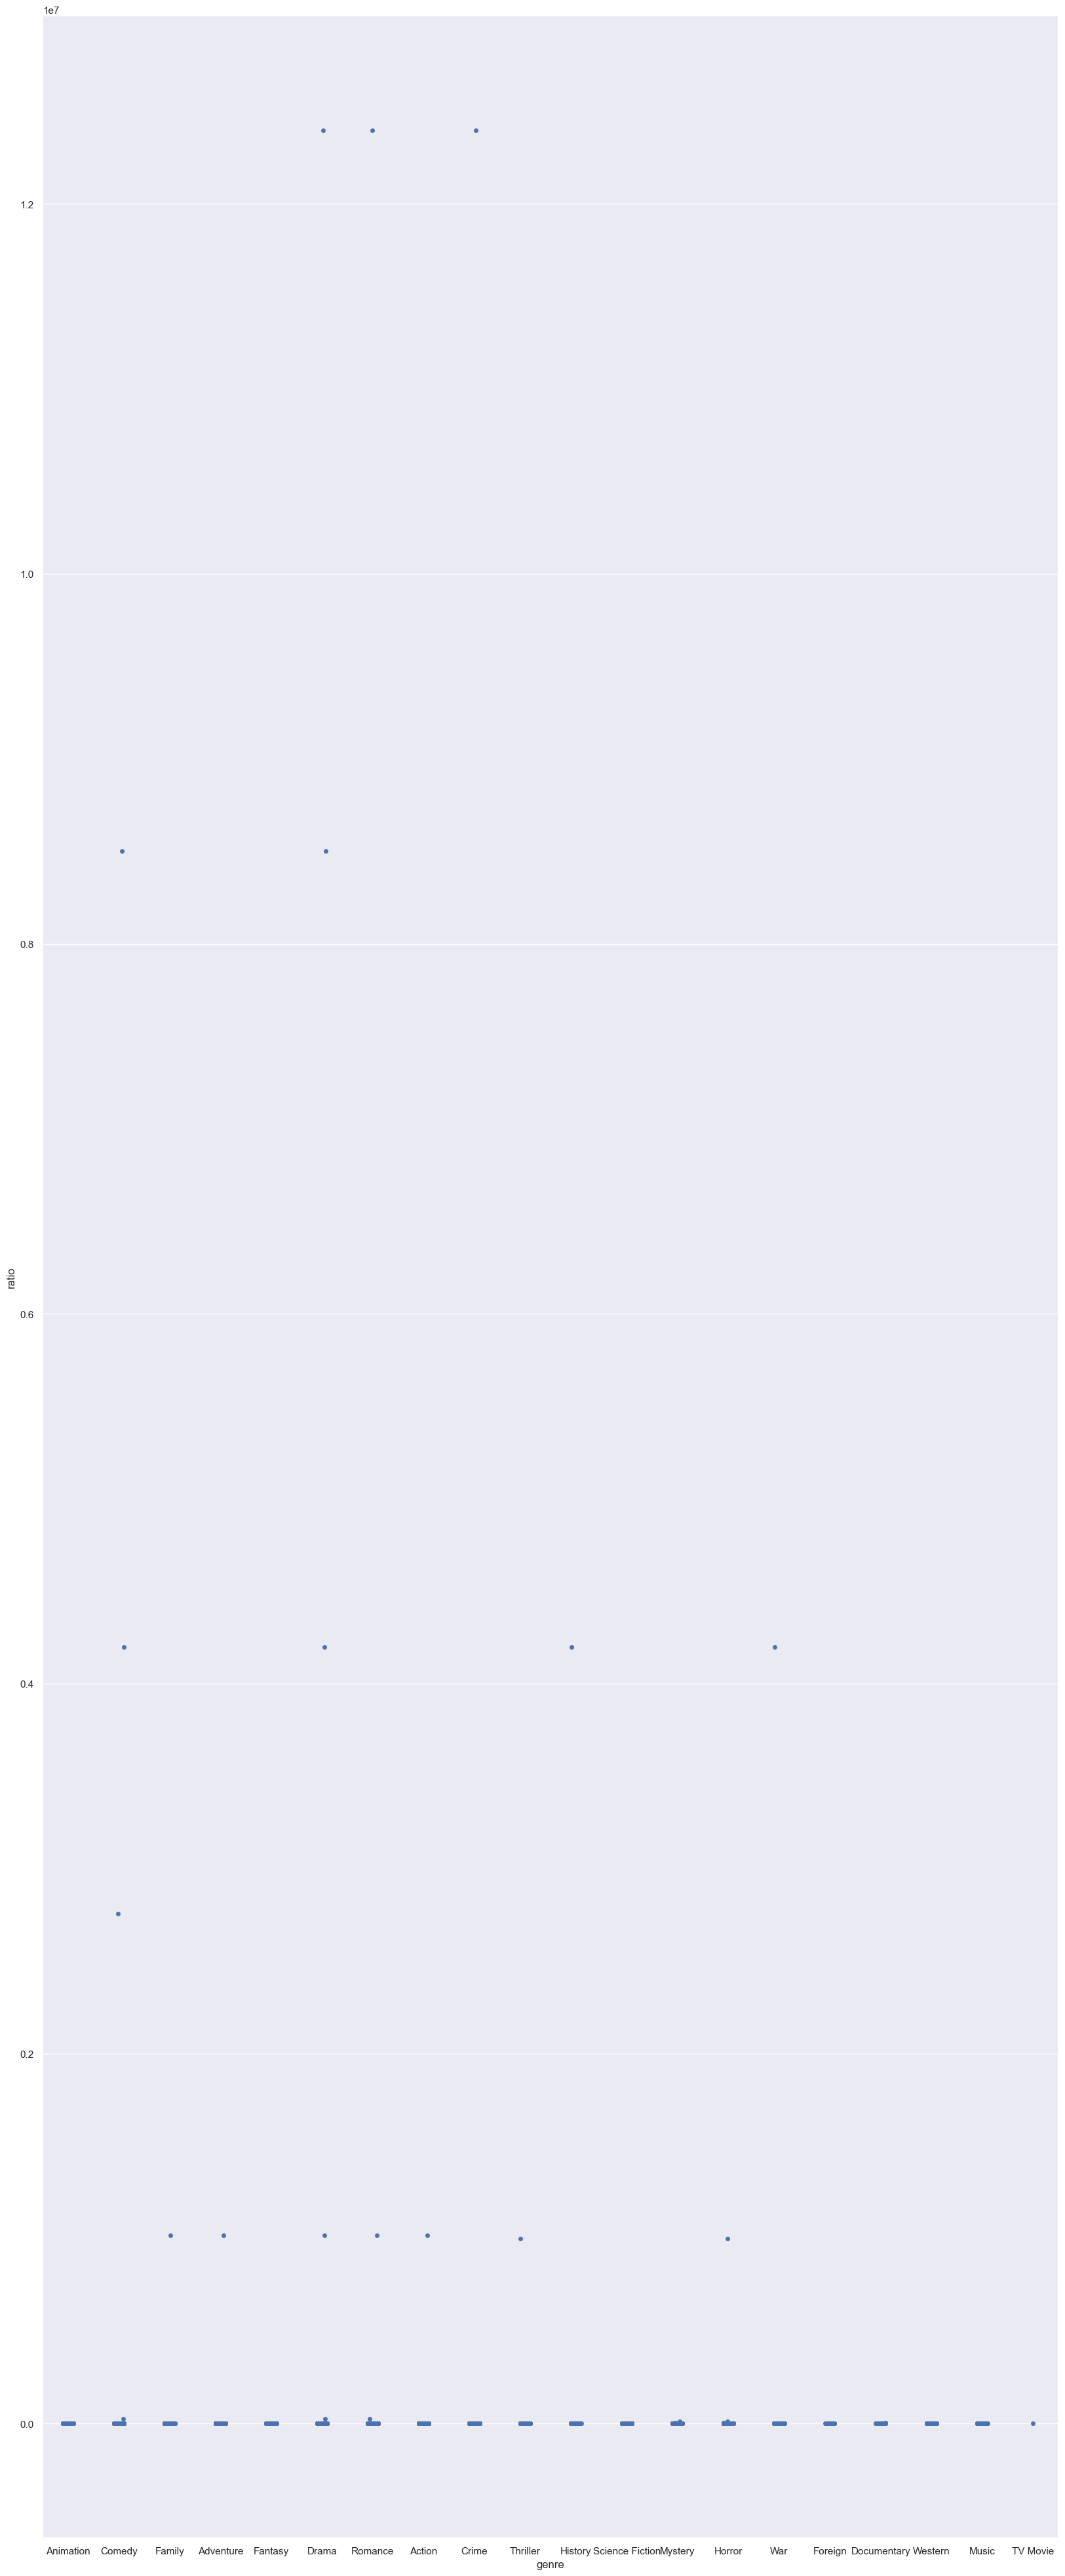

In [26]:
sns.stripplot(data=df_final_2, x="genre", y="ratio")